# Markov chain for a bacterial culture

Text(0, 0.5, 'percentage')

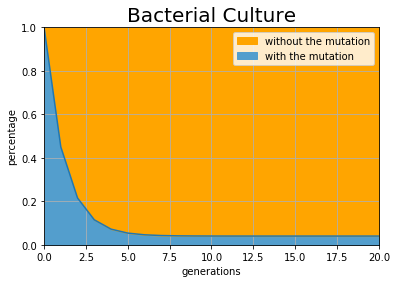

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

current_state = np.array([[1,0]])
transition_matrix = np.array([[0.45, 0.55], [0.023, 0.977]])

generations = [current_state[0][0]]
for i in range(20):
    next_state = current_state.dot(transition_matrix)
    generations.append(next_state[0][0])
    current_state = next_state
    
plt.plot(generations)
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.grid()
plt.fill_between(range(21),generations, color='#539ecd')
plt.fill_between(range(21), generations, np.max(generations), color='#ffa500')
plt.title('Bacterial Culture', fontsize=20)

with_mutation = patches.Patch(color='#539ecd', label="with the mutation")
without_mutation = patches.Patch(color='#ffa500', label="without the mutation")
plt.legend(handles=[without_mutation, with_mutation])

plt.xlabel('generations')
plt.ylabel('percentage')

In [40]:
print('After 20 generations, %.2f%% still have the mutation.' % (generations[-1] * 100))

After 20 generations, 4.01% still have the mutation.


# Stochastic Gradient Descent on Rosenbrock's function

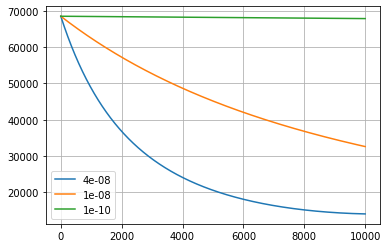

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import random



def rosenbrock_f(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (x[:-1] - 1)**2)


def rosenbrock_df(x):
    gradient = np.zeros_like(x)
    gradient[0] = -400 * x[0] * (x[1] - x[0])**2 + 2 * x[0] - 2
    gradient[1:-1] = 200 * (x[1:-1] - x[:-2]**2) - 400 * x[1:-1] * (x[2:] - x[1:-1]**2.0) + 2 * x[1:-1] - 2
    gradient[-1] = 200 * (x[-1] - x[-2]**2)
    return gradient


def minimize(x, lrate, iterations=10000):
    points = np.array([])
    for i in range(iterations):
        points = np.append(points, [rosenbrock_f(x[i])])
        x = np.insert(x, len(x), x[i] - lrate*rosenbrock_df(x[i]), axis=0)
    return x, points

def plot_lrates(x1, lrates):
    for a in lrates:
        res, points = minimize(x1, a)
        plt.plot(points, label=str(a))

    plt.grid()
    plt.legend()
    
plot_lrates(np.array([20 * [3.0]]), [0.00000004, 1e-8, 1e-10])